In [12]:
from sklearn.datasets import load_iris,load_breast_cancer,fetch_california_housing,load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score,recall_score

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree
import numpy as np

import graphviz
import matplotlib.pyplot as plt

In [11]:
cancer_data = load_breast_cancer()
X_train,X_test, y_train,y_test = train_test_split(
    cancer_data.data,cancer_data.target,test_size=0.3,random_state=123
)
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [13]:
dmtrain = xgb.DMatrix(data=X_train,label=y_train)
dmtest = xgb.DMatrix(data=X_test,label=y_test)

Dmatrix : Numpy 입력 파라미터로 만들어지는
XGBoost의 전용 데이터 세트.
Parameter : data(feature data set), label(label data/target data)

In [14]:
params = {
    'max_depth': 3,
    'eta':0.15,
    'objective': 'binary:logistic',
    'eval_metric':'error'
}
num_rounds = 500

Parameters 입력을 딕셔너리 형태로 지정하여 train 메서드에 입력
eval_metric 설명(이진분류 기준)
logloss Logarithmic Loss — 확률 기반 예측 평가, 낮을수록 좋음
error 분류 오류율 (예: 0.1이면 10% 틀림)
auc Area Under ROC Curve — 1에 가까울수록 좋음
aucpr Area Under Precision-Recall Curve

In [16]:
evals = [(dmtrain,'train'),(dmtest,'test')]
xgb_model = xgb.train(
    params=params,
    dtrain = dmtrain,
    num_boost_round = num_rounds,
    early_stopping_rounds=20,
    evals=evals
)

[0]	train-error:0.36181	test-error:0.39766
[1]	train-error:0.06784	test-error:0.08187
[2]	train-error:0.02513	test-error:0.04678
[3]	train-error:0.01508	test-error:0.04678
[4]	train-error:0.01759	test-error:0.04678
[5]	train-error:0.01759	test-error:0.04094
[6]	train-error:0.01759	test-error:0.04094
[7]	train-error:0.01005	test-error:0.04094
[8]	train-error:0.01005	test-error:0.04094
[9]	train-error:0.01508	test-error:0.04094
[10]	train-error:0.01005	test-error:0.04094
[11]	train-error:0.00754	test-error:0.03509
[12]	train-error:0.00754	test-error:0.04094
[13]	train-error:0.00754	test-error:0.03509
[14]	train-error:0.00754	test-error:0.02339
[15]	train-error:0.00754	test-error:0.02339
[16]	train-error:0.00754	test-error:0.02339
[17]	train-error:0.00754	test-error:0.02924
[18]	train-error:0.00754	test-error:0.02339
[19]	train-error:0.00754	test-error:0.02924
[20]	train-error:0.00754	test-error:0.02924
[21]	train-error:0.00754	test-error:0.02339
[22]	train-error:0.00754	test-error:0.0233

early_stopping_rounds=20 : validation set(metric)의 점수가 "현재까지 가장 좋은 값(best
score)"보다 작아야지만 개선으로 간주된다

In [17]:
predict_probability = xgb_model.predict(dmtest)
print(np.round(predict_probability[:10],3))

[0.996 0.994 0.012 0.981 0.007 0.896 0.963 0.987 0.798 0.893]


In [18]:
predict_integer = [1 if p > 0.5 else 0 for p in predict_probability]
print(predict_integer[:10])

[1, 1, 0, 1, 0, 1, 1, 1, 1, 1]


[:10] : 전체 예측 결과 중 앞에서 10개만 출력
dmtest를 사용한 모델의 예측값은 확률(실수)로 주어지므로
정수형의 변환이 필요할 수 있다.

In [19]:
print('Accuracy : {}'.format(accuracy_score(y_test,predict_integer)))
print('precision : {}'.format(precision_score(y_test,predict_integer)))
print('Accuracy : {}'.format(recall_score(y_test,predict_integer)))

Accuracy : 0.9766081871345029
precision : 0.9805825242718447
Accuracy : 0.9805825242718447


실제값(y_test)과 예측값(predict_integer)를 비교한 후
모델의 정확도/정밀도/재현율을 출력해 본다.

In [21]:
import pandas as pd
features = cancer_data.data
label = cancer_data.target

cancer_df = pd.DataFrame(data=features,columns=cancer_data.feature_names)
cancer_df['target'] = label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


DataFrame으로 변환 후 Breast cancer data의 features를 확인 !!

In [22]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Breast cancer data의 features를 확인 !!

In [29]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

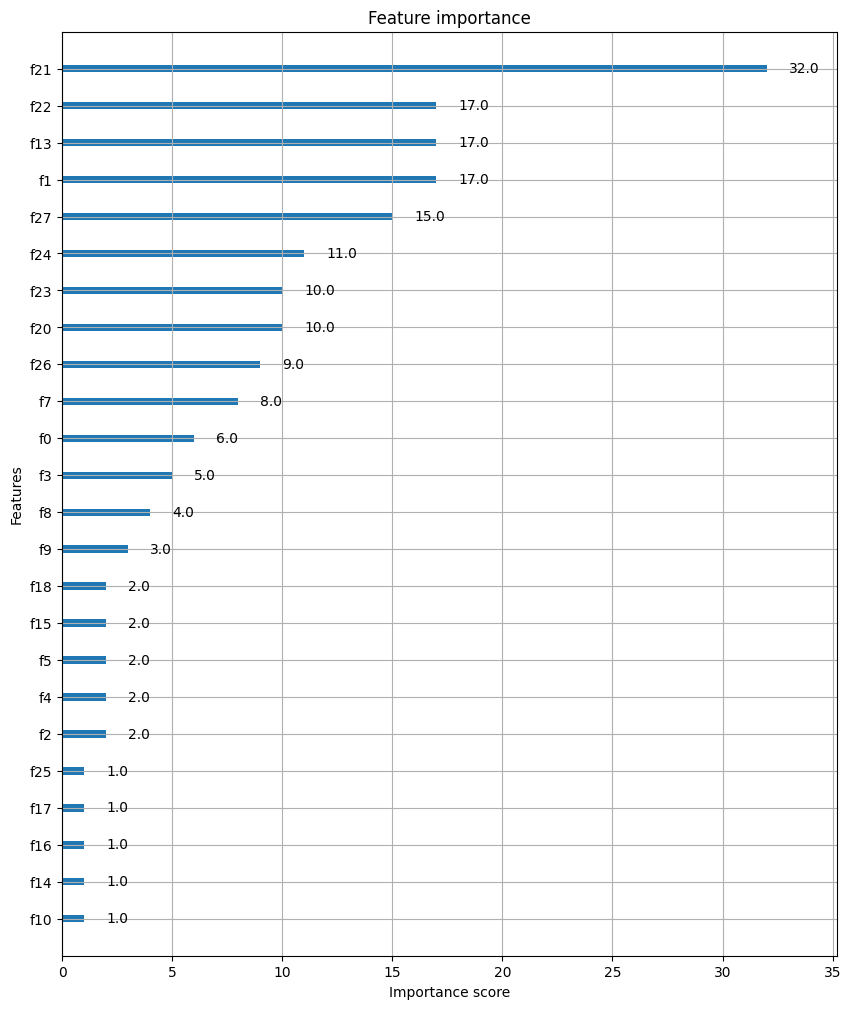

In [24]:
fig, ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_model,ax=ax)

feature(f21)이 예측결과에
가장 많은 영향(?)을 미쳐서
상대적으로
중요한 feature임을 보여준다.
(relative importance)

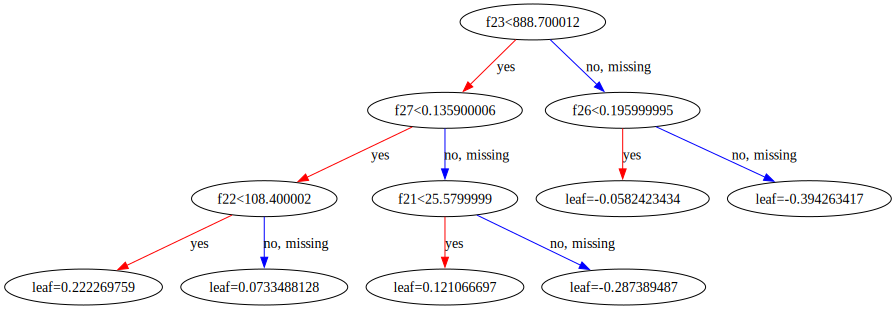

In [25]:
xgb.to_graphviz(xgb_model)

입력 feature이 순서적 관점에서 선택되므로
그 출력 결과값(prediction)이
Plot_importance와 꼭 매칭되지는 않는다.
(the order of features in modeling)

c:\Users\main\miniconda3\envs\openai_api_part1\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


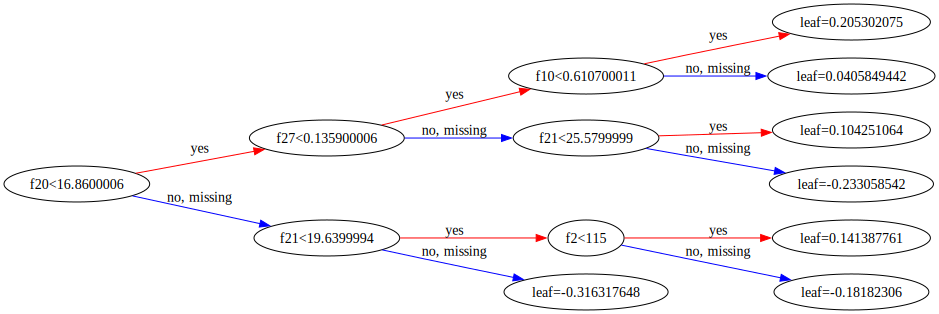

In [26]:
xgb.to_graphviz(xgb_model,num_trees=1,rankdir='LR',size='15,15')

입력 feature이 순서적 관점에서
선택되므로
그 출력 결과값(prediction)이
Plot_importance와 꼭 매칭되지는 않는다.
(the order of features in modeling)

scikit learn pkl로 저장해서 내가 원하는 데이터를 테스트 가능

In [30]:
iris = load_iris()

X_train, X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.25,random_state=42)


In [33]:
xgbc_model = XGBClassifier(n_estimators = 200, learning_rate = 0.01, max_depth=2,random_state=42)
xgbc_model.fit(X_train,y_train)
preds=xgbc_model.predict(X_test)
preds_probability = xgbc_model.predict_proba(X_test)[:,:]
print(preds_probability)


[[0.07769491 0.84428203 0.07802306]
 [0.87288237 0.06569149 0.06142613]
 [0.06055531 0.0717311  0.8677136 ]
 [0.07297059 0.7929446  0.13408475]
 [0.06671529 0.69124424 0.24204046]
 [0.87288237 0.06569149 0.06142613]
 [0.07769491 0.84428203 0.07802306]
 [0.06608556 0.11448288 0.8194316 ]
 [0.07277572 0.7908271  0.13639718]
 [0.07769491 0.84428203 0.07802306]
 [0.06608556 0.11448288 0.8194316 ]
 [0.8722347  0.06564275 0.06212254]
 [0.87288237 0.06569149 0.06142613]
 [0.8722347  0.06564275 0.06212254]
 [0.87288237 0.06569149 0.06142613]
 [0.07297059 0.7929446  0.13408475]
 [0.0669054  0.07925314 0.8538414 ]
 [0.07757404 0.8429686  0.07945736]
 [0.07769491 0.84428203 0.07802306]
 [0.06055531 0.0717311  0.8677136 ]
 [0.8722347  0.06564275 0.06212254]
 [0.07464884 0.26156616 0.663785  ]
 [0.87288237 0.06569149 0.06142613]
 [0.06055531 0.0717311  0.8677136 ]
 [0.0669054  0.07925314 0.8538414 ]
 [0.0669054  0.07925314 0.8538414 ]
 [0.06055531 0.0717311  0.8677136 ]
 [0.0669054  0.07925314 0.85

predict_proba() : 분류 모델이 각 클래스에 대해 예측한 확률값(Probability)을 반환하는 함수

In [34]:
accuracy = xgbc_model.score(X_test,y_test)
print("Accuracy : %.2f"%accuracy)

Accuracy : 1.00


In [35]:
from sklearn.metrics import classification_report
report = classification_report(y_test,preds)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [36]:
features = iris.data
label = iris.target

iris_df =pd.DataFrame(data=features,columns=iris.feature_names)
iris_df['target']=label
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


DataFrame으로 변환 후 주요 특징값을 확인하기 위해 정보 출력 !

In [38]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

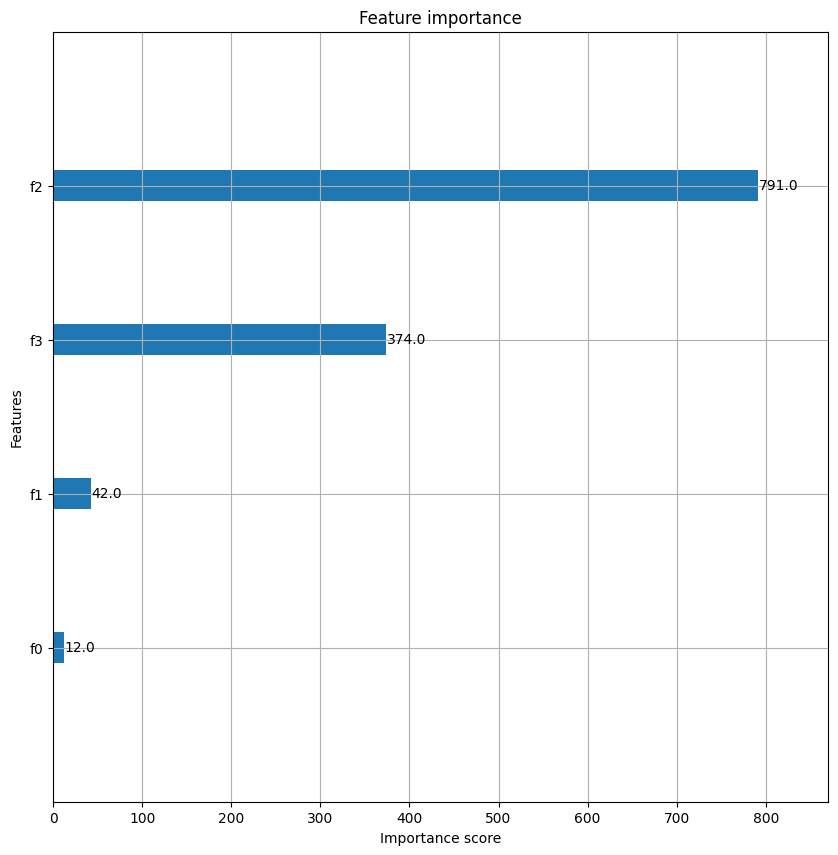

In [40]:
fig,ax=plt.subplots(figsize=(10,10))
plot_importance(xgbc_model, ax=ax)

중요도 순으로 정리된
붓꽃 데이터의 특징
(f1 > F2 > f0 > f3)

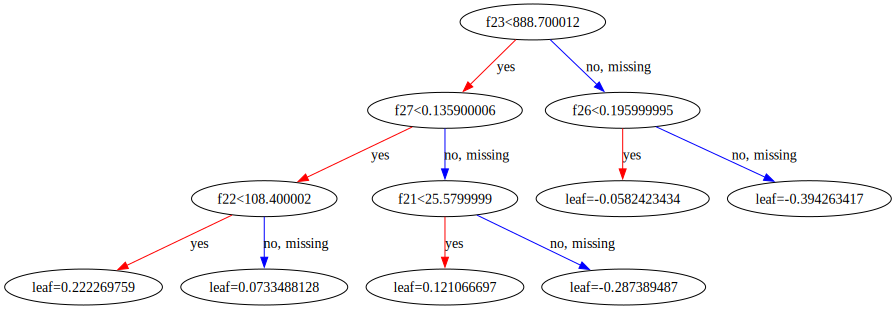

In [41]:
xgb.to_graphviz(xgb_model)

c:\Users\main\miniconda3\envs\openai_api_part1\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


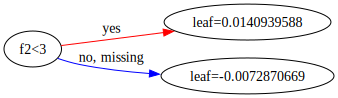

In [42]:
xgb.to_graphviz(xgbc_model,num_trees=0,rankdir='LR',size='10,10')

의사결정나무를 그래픽으로 시각화
(만들어진 트리 중 첫번째 트리 : num_trees =0)

c:\Users\main\miniconda3\envs\openai_api_part1\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


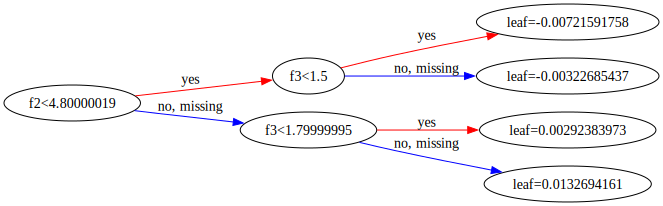

In [43]:
xgb.to_graphviz(xgbc_model,num_trees=5,rankdir='LR',size='10,10')

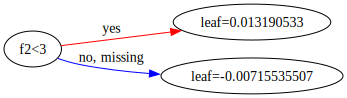

In [44]:
xgb.to_graphviz(xgbc_model,num_trees=15,rankdir='LR',size='10,10')

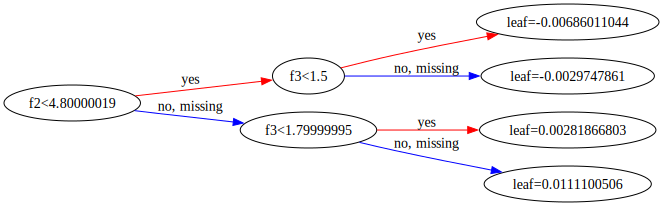

In [45]:
xgb.to_graphviz(xgbc_model,num_trees=50,rankdir='LR',size='10,10')

In [46]:
california = fetch_california_housing()
X_train,X_test,y_train,y_test = train_test_split(california.data,california.target,test_size=0.25,random_state=123)

캘리포니아 집값 데이터의 업로드 및 자료 분할

In [47]:
xgbr_model = XGBRegressor(n_estimators =20, learning_rate=0.2,objective='reg:squarederror',max_depth=4,random_state=123)

In [49]:
xgbr_model.fit(X_train,y_train)
preds = xgbr_model.predict(X_test)

모델의 설정 및 예측 : regression의 MSE 오차를 사용

In [52]:
accuracy = xgbr_model.score(X_test,y_test)
print("Accuracy: %.2f"%accuracy)

Accuracy: 0.78


In [53]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,preds)
print("MSE: %.2f"%mae)

MSE: 0.38



분류의 문제는
XGBClassifier를 사용하여
Precision/recall을 비교하나
회귀의 문제는
오류의 정도를 구하므로
MAE, RMSE 등을 사용해야

In [56]:
features = california.data
label = california.target
california_df = pd.DataFrame(data = features, columns= california.feature_names)
california_df['target'] = label
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


DataFrame으로 변환 후 특징값을 확인 !!

In [57]:
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


특징값을 확인 !!(f0 ~ f7)

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

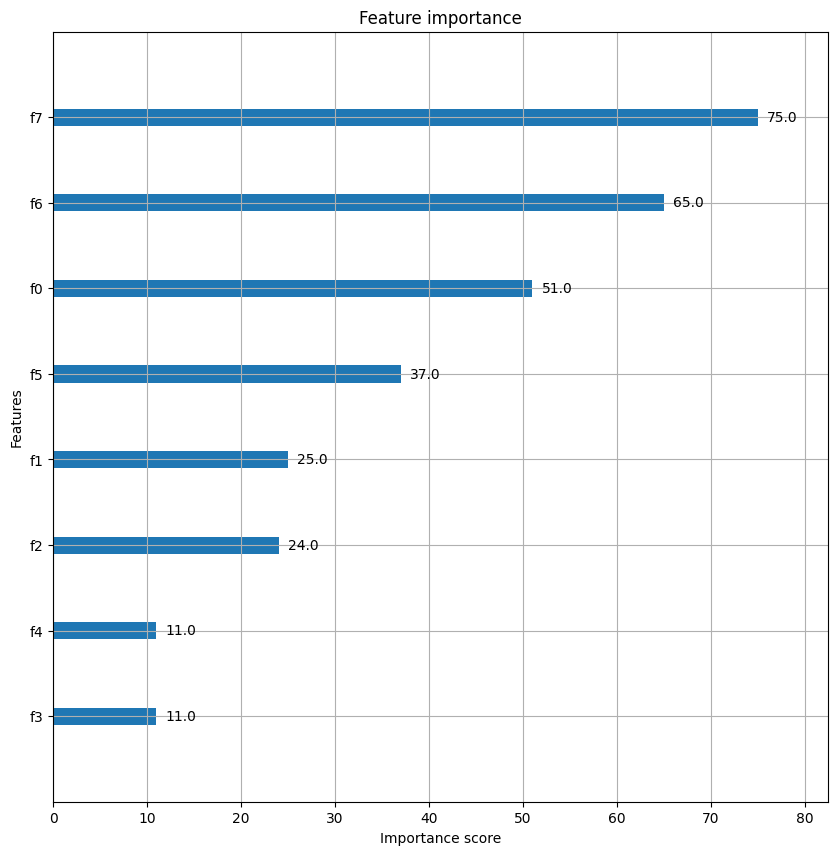

In [59]:
fig,ax = plt.subplots(figsize =(10,10))
plot_importance(xgbr_model,ax=ax)

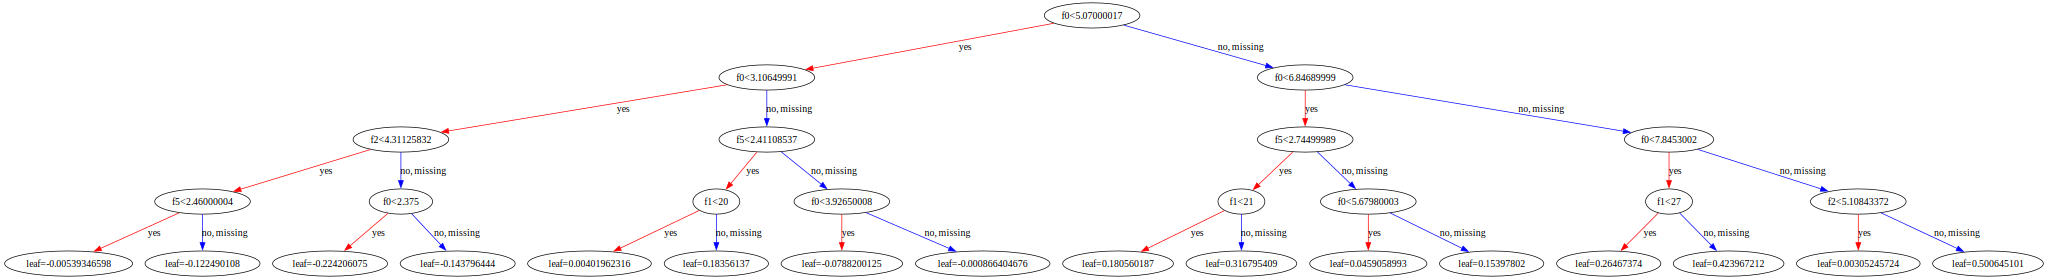

In [60]:
xgb.to_graphviz(xgbr_model)

c:\Users\main\miniconda3\envs\openai_api_part1\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


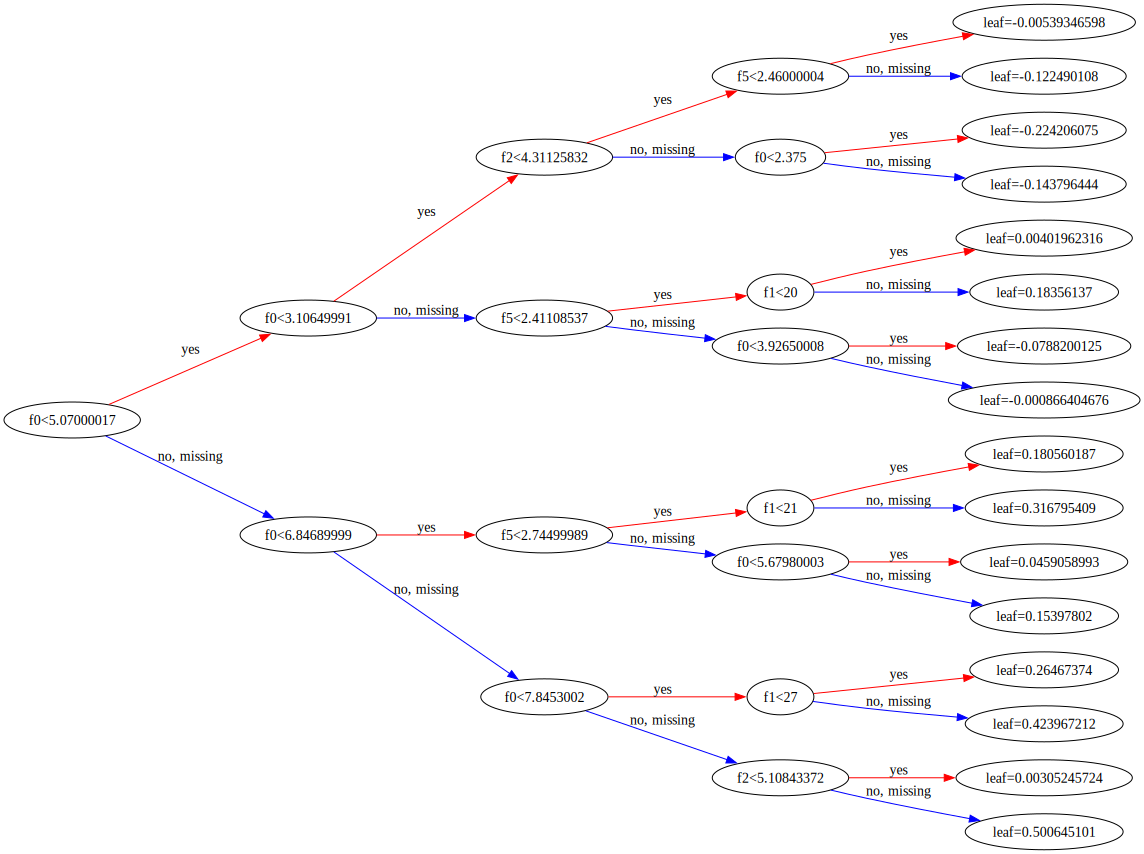

In [61]:
xgb.to_graphviz(xgbr_model,num_trees=0,rankdir='LR',size='20,20')

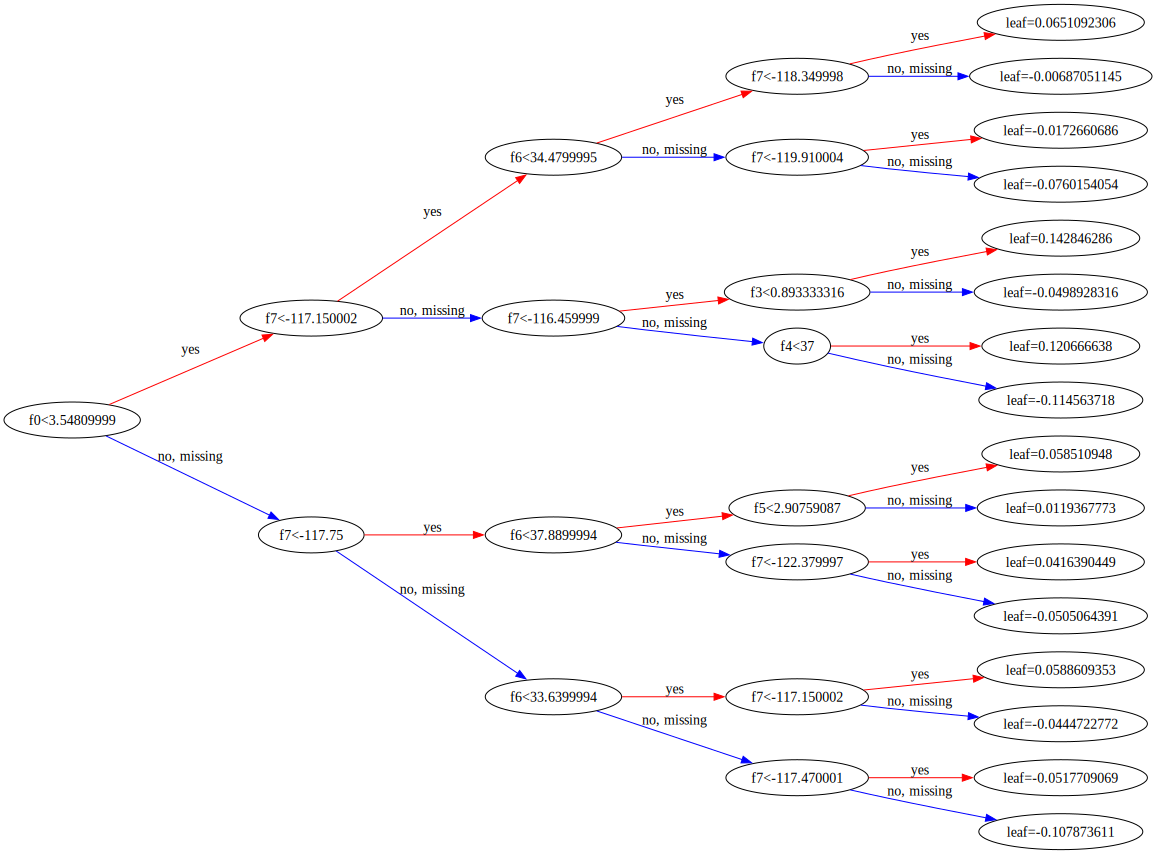

In [62]:
xgb.to_graphviz(xgbr_model,num_trees=10,rankdir='LR',size='20,20')